In [119]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [102]:
data = load_digits(as_frame=True)
X, y, images = data.data, data.target, data.images

In [50]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [51]:
X.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [182]:
y.value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: target, dtype: int64

In [53]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [183]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X, y, images, train_size=0.6, random_state=0)

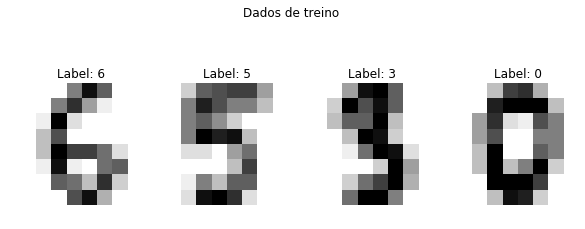

In [184]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle("Dados de treino")
for ax, image, label in zip(axes, images_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)

In [222]:
model = RandomForestClassifier(criterion="entropy", n_estimators=200, max_depth=3, random_state=0)

In [223]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200,
                       random_state=0)

In [224]:
y_pred = model.predict(X_test)

In [225]:
accuracy_score(y_test, y_pred)

0.847009735744089

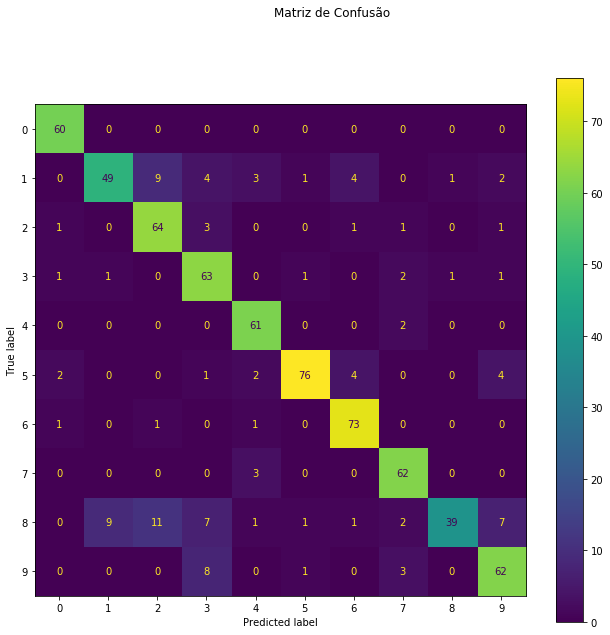

In [226]:
fig, ax = plt.subplots(figsize=(11, 10))
disp = plot_confusion_matrix(model, X_test, y_test, ax=ax)
disp.figure_.suptitle("Matriz de Confusão");

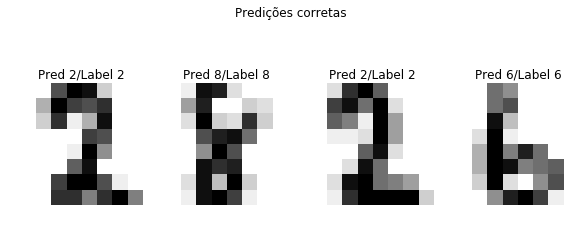

In [208]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle("Predições corretas")
for ax, image, pred, label in zip(axes, images_test[y_pred == y_test], y_pred[y_pred == y_test], y_test[y_pred == y_test]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred {pred}/Label {label}')

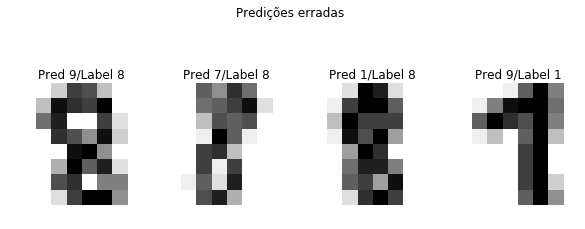

In [209]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle("Predições erradas")
for ax, image, pred, label in zip(axes, images_test[y_pred != y_test], y_pred[y_pred != y_test], y_test[y_pred != y_test]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred {pred}/Label {label}')

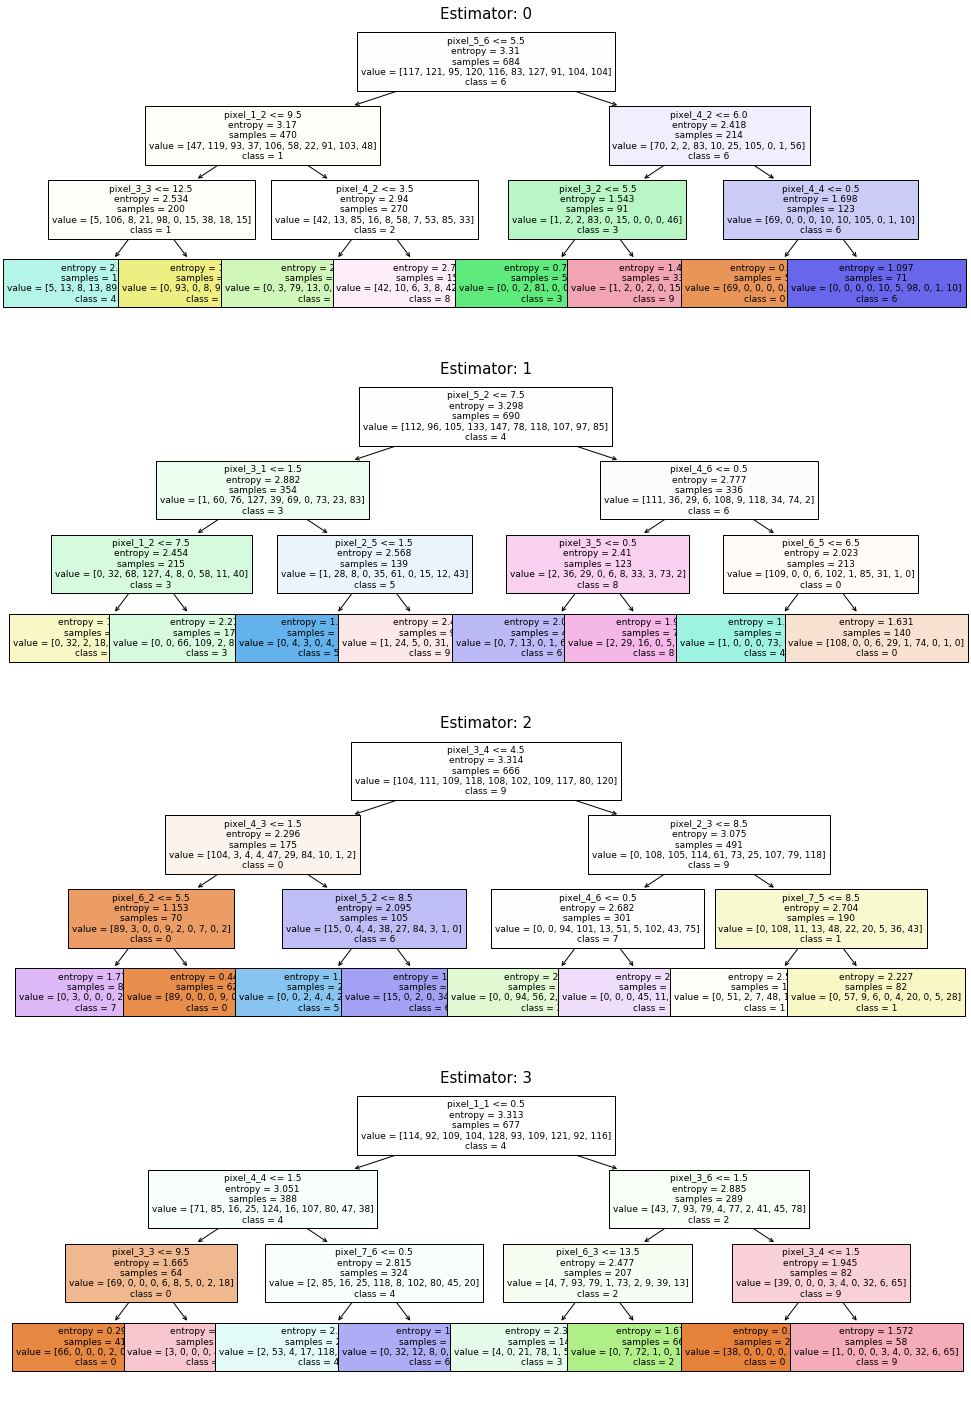

In [173]:
# This may not the best way to view each estimator as it is small
num_trees = 4
fn = data.feature_names
cn = [str(t) for t in data.target_names]
fig, axes = plt.subplots(num_trees, 1, figsize=(16,25))
for index in range(0, num_trees):
    plot_tree(model.estimators_[index],
              feature_names=fn, 
              class_names=cn,
              filled=True,
              ax=axes[index],
              fontsize=9)
    axes[index].set_title('Estimator: ' + str(index), fontsize=15)

<BarContainer object of 64 artists>

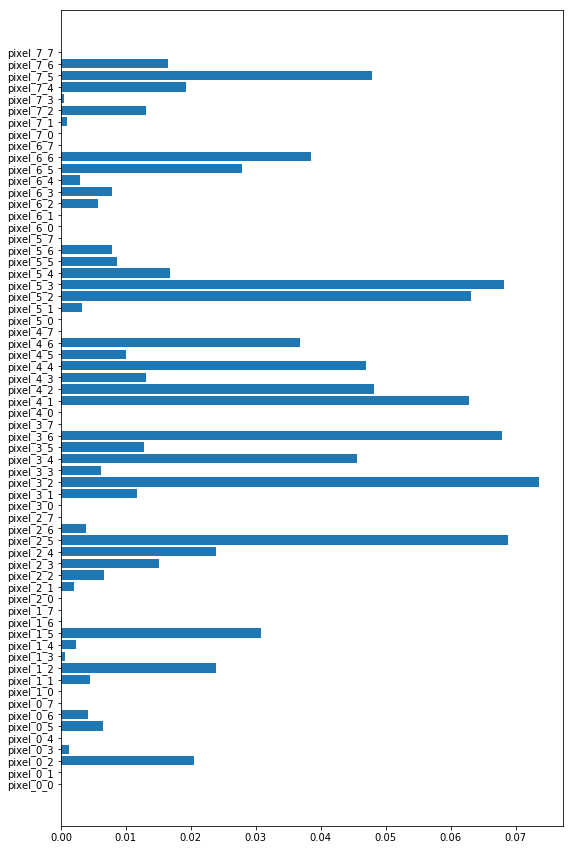

In [231]:
fig, ax = plt.subplots(figsize=(9, 15))
ax.barh(data.feature_names, model.feature_importances_)